In [1]:
# have import warning for better performances
# import pandas numpy and sklearn
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import sklearn 

In [2]:
# read a data using panda
data = pd.read_csv("Fish_dataset.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
# describe the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
# columns name
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [5]:
# checking null value using (isna)
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<Axes: >

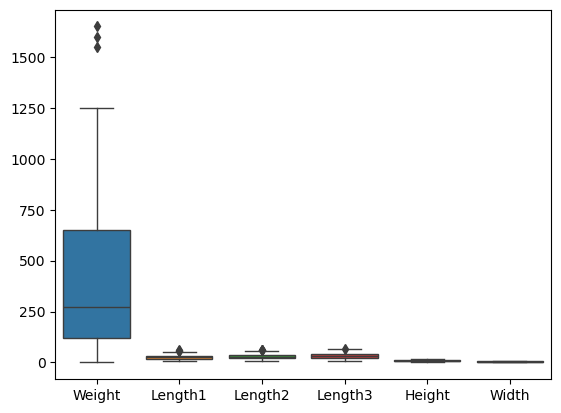

In [7]:
# import seaborn for plotting
# boxplot used for finding outliers
import seaborn as sns
sns.boxplot(data, linewidth=1)

In [8]:
# used to detect outliers & replace outliers with medain value
for cols in data.columns[::]:
    if data[cols].dtype == object:
        continue
    else:
        Q1 = data[cols].quantile(q=0.25)
        Q3 = data[cols].quantile(q=0.75)
        iqr = Q3 - Q1
        
        low = Q1-1.5*(Q3 - Q1)
        high =  Q3 + 1.5*(Q3 - Q1)
        data.loc[(data[cols]<low) | (data[cols]>high), cols] = data[cols].median()

<Axes: >

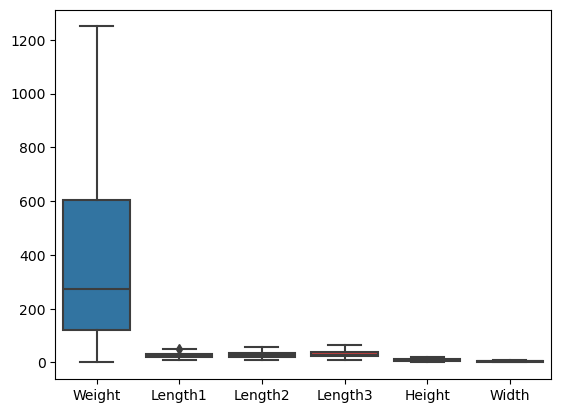

In [9]:
# outliers are replaced 
sns.boxplot(data)

In [10]:
# performs One-Hot Encoding
# create dummy variables and concate with original dataframe
x=data['Species']
df=pd.get_dummies(x)
data=pd.concat([data,df], axis=1)
data.drop(['Species'],axis=1, inplace=True)

In [11]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import sklearn 

<Axes: >

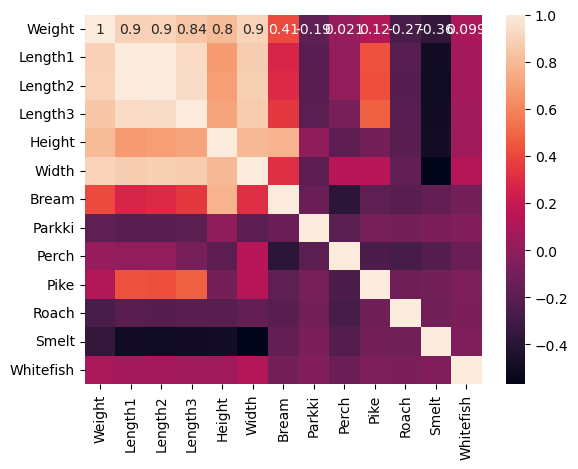

In [12]:
# detceting corr() using heatmap
sns.heatmap(data.corr(), annot=True)

In [13]:
# multiple-regression

x = data.drop("Weight", axis=1)
y = data['Weight']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
ypr = model1.predict(x_test)
yp = model1.predict(x_train)
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
MAE = mean_absolute_error(y_test, ypr)
RMSE = rmse(y_test, ypr)

print('MAE =',MAE,'\nRMSE =',RMSE)

MAE = 68.69519839625492 
RMSE = 92.99594810308768


*  multiple-Regression

It creates a new DataFrame "x" by dropping the column "Weight" from the DataFrame "data" using the drop() function from pandas, with axis=1 indicating dropping along columns.

1.x = data.drop("Weight", axis=1)
It assigns the column "Weight" from the DataFrame "data" to a new variable "y".

2.y = data['Weight']
It imports the train_test_split function from the sklearn.model_selection module, which is used for splitting the data into training and testing sets.

3.from sklearn.model_selection import train_test_split
It splits the data into training and testing sets using the train_test_split function, where x_train and y_train represent the training features and target, respectively, and x_test and y_test represent the testing features and target, respectively. The test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing, and the random_state parameter is set to 40 for reproducibility.

4.x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
It imports the LinearRegression model from the sklearn.linear_model module.

5.from sklearn.linear_model import LinearRegression
It initializes a LinearRegression model as "model1".

7.model1 = LinearRegression()
It fits the model using the training data.

8.model1.fit(x_train, y_train)
It predicts the target variable for both the testing and training data using the trained model.

ypr = model1.predict(x_test)
yp = model1.predict(x_train)
It imports mean_absolute_error from sklearn.metrics and rmse from statsmodels.tools.eval_measures to evaluate the performance of the model.

9.from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
It calculates the mean absolute error (MAE) and root mean squared error (RMSE) between the predicted values and the actual values for the testing data.

MAE = mean_absolute_error(y_test, ypr)
RMSE = rmse(y_test, ypr)
It prints the MAE and RMSE values.

print('MAE =', MAE, '\nRMSE =', RMSE)

In [14]:
r2_score(y_test,ypr)

0.9266358065633944

In [15]:
r2_score(y_train,yp)

0.9453957160037875

In [24]:
# to get better bestfit line we lasso() and Rigid()
from sklearn.linear_model import Lasso

lasso1 = Lasso()
lasso1.fit(x_train,y_train)


Lasso()

In [25]:
lasso1.score(x_train,y_train)

0.817050341812085

In [26]:
lasso1.score(x_test,y_test)

0.7738462331220086

In [28]:
from sklearn.linear_model import Ridge
rid_reg = Ridge()
rid_reg.fit(x_train,y_train)

Ridge()

In [29]:
rid_reg.score(x_test,y_test)

0.773948689293116

In [30]:
rid_reg.score(x_train,y_train)

0.8170470208023707

In [17]:
x = data['Width'].values.reshape(-1,1)
y = data['Weight'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
yp = model.predict(x_test)
y = model.predict(x_train)
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test,yp)

0.7735488170097967

In [19]:
r2_score(y_train,y)

0.8170543574935215

In [32]:
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet()
en_reg.fit(x_train,y_train)

ElasticNet()

In [33]:
en_reg.score(x_test,y_test)

0.7717436599750743

In [34]:
en_reg.score(x_train,y_train)

0.7958235103581836